# Facebook Prophet (Car Sales Forecasting)

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from prophet import Prophet

## 1. Data

In [2]:
df = pd.read_csv('monthly-car-sales.csv')

In [3]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

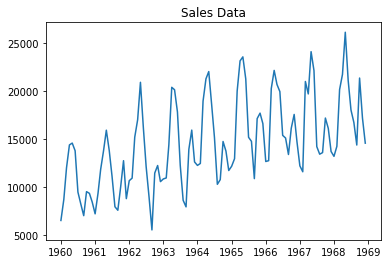

In [5]:
plt.plot(df.ds, df.y)
plt.title('Sales Data')
plt.show()

## 2. Model

In [6]:
train = df.drop(df.index[-12:])

model = Prophet()
model.fit(train)

future = pd.DataFrame([f"1968-{i:02d}" for i in range(1, 13)], columns=['ds'])
future['ds'] = pd.to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)

# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -104.85
Iteration  1. Log joint probability =    72.7915. Improved by 177.641.
Iteration  2. Log joint probability =     141.49. Improved by 68.6982.
Iteration  3. Log joint probability =    148.523. Improved by 7.03351.
Iteration  4. Log joint probability =    148.546. Improved by 0.0223531.
Iteration  5. Log joint probability =    148.554. Improved by 0.00880483.
Iteration  6. Log joint probability =    148.576. Improved by 0.0214036.
Iteration  7. Log joint probability =    148.585. Improved by 0.00973269.
Iteration  8. Log joint probability =    148.606. Improved by 0.0204538.
Iteration  9. Log joint probability =    148.617. Improved by 0.0106609.
Iteration 10. Log joint probability =    148.636. Improved by 0.0195037.
Iteration 11. Log joint probability =    148.648. Improved by 0.0115894.
Iteration 12. Log joint probability =    148.666. Improved by 0.0185532.
Iteration 13. Log joint probability =    148.679. Improved by 0.0125183.
Iteration 14. 

MAE: 1336.814


## 3. Evaluation

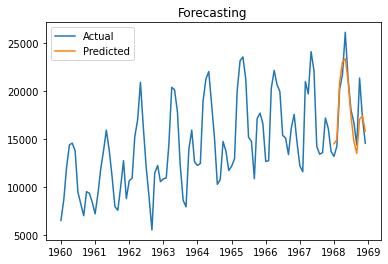

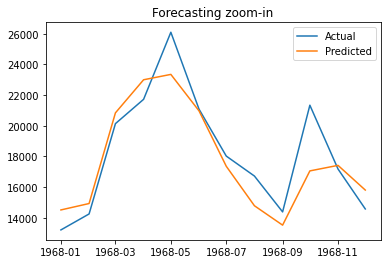

In [7]:
plt.title('Forecasting')
plt.plot(df['ds'], df['y'], label='Actual')
plt.plot(future, y_pred, label='Predicted')
plt.legend()
plt.show()

plt.title('Forecasting zoom-in')
plt.plot(df.iloc[-12:]['ds'], df.iloc[-12:]['y'].values, label='Actual')
plt.plot(df.iloc[-12:]['ds'], y_pred, label='Predicted')
plt.legend()
plt.show()